# Imports

In [1]:
using Printf
using JLD

import PyPlot

# 1.1

In [2]:
include("example_train.jl")

Training error with depth-1 accuracy-based decision tree: 0.25
Training error with depth-2 accuracy-based decision tree: 0.17
Training error with depth-3 accuracy-based decision tree: 0.13
Training error with depth-4 accuracy-based decision tree: 0.11
Training error with depth-5 accuracy-based decision tree: 0.11
Training error with depth-6 accuracy-based decision tree: 0.11
Training error with depth-7 accuracy-based decision tree: 0.11
Training error with depth-8 accuracy-based decision tree: 0.11
Training error with depth-9 accuracy-based decision tree: 0.11
Training error with depth-10 accuracy-based decision tree: 0.11
Now let's try infogain instead of accuracy...
Training error with depth-1 infogain-based decision tree: 0.33
Training error with depth-2 infogain-based decision tree: 0.24
Training error with depth-3 infogain-based decision tree: 0.15
Training error with depth-4 infogain-based decision tree: 0.13
Training error with depth-5 infogain-based decision tree: 0.08
Training

# 1.2

In [3]:
# Load X and y variable
X = load("citiesSmall.jld","X")
y = load("citiesSmall.jld","y")

include("decisionTree_infoGain.jl")

n = size(X,1)

depthTrainError = zeros(15)
depthTestError = zeros(15)

for depth in 1:15
    @printf("\nTrain decision tree with depth-%d\n",depth)

    model = decisionTree_infoGain(X,y,depth)

    # Evaluate the training error
    yhat = model.predict(X)
    trainError = sum(yhat .!= y)/n
    @printf("Train error with depth-%d decision tree: %.3f\n",depth,trainError)

    # Evaluate the test error
    Xtest = load("citiesSmall.jld","Xtest")
    ytest = load("citiesSmall.jld","ytest")
    t = size(Xtest,1)
    yhat = model.predict(Xtest)
    testError = sum(yhat .!= ytest)/t
    @printf("Test error with depth-%d decision tree: %.3f\n",depth,testError)
    
    depthTrainError[depth] = trainError
    depthTestError[depth] = testError
end


Train decision tree with depth-1
Train error with depth-1 decision tree: 0.325
Test error with depth-1 decision tree: 0.333

Train decision tree with depth-2
Train error with depth-2 decision tree: 0.242
Test error with depth-2 decision tree: 0.286

Train decision tree with depth-3
Train error with depth-3 decision tree: 0.150
Test error with depth-3 decision tree: 0.177

Train decision tree with depth-4
Train error with depth-4 decision tree: 0.125
Test error with depth-4 decision tree: 0.183

Train decision tree with depth-5
Train error with depth-5 decision tree: 0.080
Test error with depth-5 decision tree: 0.127

Train decision tree with depth-6
Train error with depth-6 decision tree: 0.050
Test error with depth-6 decision tree: 0.119

Train decision tree with depth-7
Train error with depth-7 decision tree: 0.020
Test error with depth-7 decision tree: 0.103

Train decision tree with depth-8
Train error with depth-8 decision tree: 0.005
Test error with depth-8 decision tree: 0.089


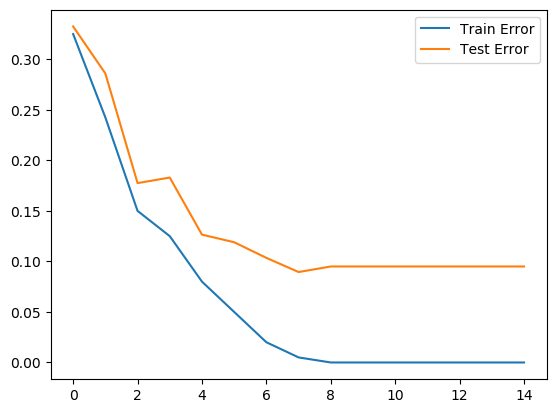

In [4]:
PyPlot.plot([depthTrainError depthTestError]);
PyPlot.legend(["Train Error"; "Test Error"]);

# 1.3

In [5]:
# Load X and y variable
X = load("citiesSmall.jld","X")
y = load("citiesSmall.jld","y")

Xtest = X[201:end, :]
ytest = y[201:end]
X = X[1:200, :]
y = y[1:200]

include("decisionTree_infoGain.jl")

n = size(X,1)

depthTrainError = zeros(15)
depthValidError = zeros(15)

for depth in 1:15
    @printf("\nTrain decision tree with depth-%d\n",depth)

    model = decisionTree_infoGain(X,y,depth)

    # Evaluate the training error
    yhat = model.predict(X)
    trainError = sum(yhat .!= y)/n
    @printf("Train error with depth-%d decision tree: %.3f\n",depth,trainError)

    # Evalute on "validating" error
    t = size(Xtest,1)
    yhat = model.predict(Xtest)
    validError = sum(yhat .!= ytest)/t
    @printf("Validation error with depth-%d decision tree: %.3f\n",depth,validError)
    
    depthTrainError[depth] = trainError
    depthValidError[depth] = validError
end


Train decision tree with depth-1
Train error with depth-1 decision tree: 0.240
Validation error with depth-1 decision tree: 0.330

Train decision tree with depth-2
Train error with depth-2 decision tree: 0.170
Validation error with depth-2 decision tree: 0.215

Train decision tree with depth-3
Train error with depth-3 decision tree: 0.130
Validation error with depth-3 decision tree: 0.145

Train decision tree with depth-4
Train error with depth-4 decision tree: 0.095
Validation error with depth-4 decision tree: 0.175

Train decision tree with depth-5
Train error with depth-5 decision tree: 0.075
Validation error with depth-5 decision tree: 0.160

Train decision tree with depth-6
Train error with depth-6 decision tree: 0.045
Validation error with depth-6 decision tree: 0.170

Train decision tree with depth-7
Train error with depth-7 decision tree: 0.045
Validation error with depth-7 decision tree: 0.170

Train decision tree with depth-8
Train error with depth-8 decision tree: 0.015
Val

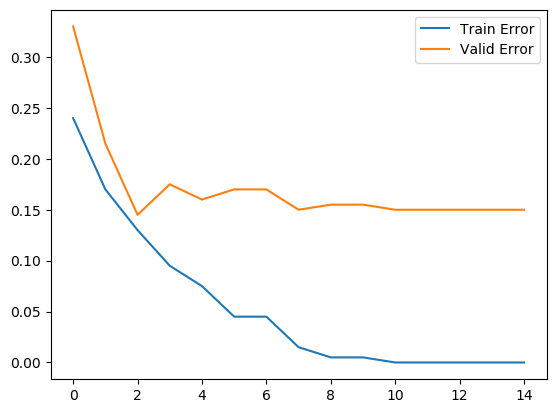

In [6]:
PyPlot.plot([depthTrainError depthValidError]);
PyPlot.legend(["Train Error"; "Valid Error"]);

In [7]:
# Load X and y variable
X = load("citiesSmall.jld","X")
y = load("citiesSmall.jld","y")

Xtest = X[1:200, :]
ytest = y[1:200]
X = X[201:end, :]
y = y[201:end]


include("decisionTree_infoGain.jl")

n = size(X,1)

depthTrainError = zeros(15)
depthValidError = zeros(15)

for depth in 1:15
    @printf("\nTrain decision tree with depth-%d\n",depth)

    model = decisionTree_infoGain(X,y,depth)

    # Evaluate the training error
    yhat = model.predict(X)
    trainError = sum(yhat .!= y)/n
    @printf("Train error with depth-%d decision tree: %.3f\n",depth,trainError)

    # Evalute on "validating" error
    t = size(Xtest,1)
    yhat = model.predict(Xtest)
    validError = sum(yhat .!= ytest)/t
    @printf("Validation error with depth-%d decision tree: %.3f\n",depth,validError)
    
    depthTrainError[depth] = trainError
    depthValidError[depth] = validError
end


Train decision tree with depth-1
Train error with depth-1 decision tree: 0.290
Validation error with depth-1 decision tree: 0.365

Train decision tree with depth-2
Train error with depth-2 decision tree: 0.250
Validation error with depth-2 decision tree: 0.240

Train decision tree with depth-3
Train error with depth-3 decision tree: 0.145
Validation error with depth-3 decision tree: 0.155

Train decision tree with depth-4
Train error with depth-4 decision tree: 0.100
Validation error with depth-4 decision tree: 0.155

Train decision tree with depth-5
Train error with depth-5 decision tree: 0.055
Validation error with depth-5 decision tree: 0.125

Train decision tree with depth-6
Train error with depth-6 decision tree: 0.025
Validation error with depth-6 decision tree: 0.120

Train decision tree with depth-7
Train error with depth-7 decision tree: 0.010
Validation error with depth-7 decision tree: 0.140

Train decision tree with depth-8
Train error with depth-8 decision tree: 0.000
Val

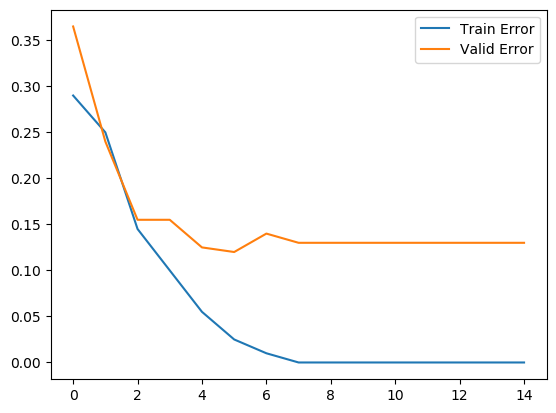

In [8]:
PyPlot.plot([depthTrainError depthValidError]);
PyPlot.legend(["Train Error"; "Valid Error"]);

We could do 5 fold cross validation to figure out the optimal depth